In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
 
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.07125704 0.214613   0.01773393 ... 0.03782733 0.02084322 0.14342434]
 [0.27417553 0.82576594 0.06823479 ... 0.14554814 0.08019842 0.55185348]
 [0.01058834 0.03189012 0.00263515 ... 0.0056209  0.00309717 0.02131194]
 ...
 [0.12144238 0.36576195 0.03022368 ... 0.0644686  0.03552282 0.2444361 ]
 [0.08690696 0.26174766 0.02162876 ... 0.04613521 0.02542094 0.17492409]
 [0.1766434  0.53201721 0.04396171 ... 0.09377247 0.05166953 0.3555433 ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 1.64481262e-01  7.37476106e-02  3.73935640e-02 ...  5.65090204e-02
   3.54502958e-02  1.80849351e-01]
 [ 1.76449824e-01  8.00638335e-01  1.04211541e-01 ...  1.12760699e-01
   1.34321146e-01  3.79120611e-01]
 [ 2.66243354e-04  1.87955368e-01  1.58692720e-01 ... -1.09113060e-01
   1.26333805e-01  1.42885702e-02]
 ...
 [ 3.41734167e-02  3.17380482e-02 -1.83552196e-03 ...  1.18509713e-01
   1.26246737e-02  4.74649586e-02]
 [ 7.82241567e-02  2.73149150e-01  6.35130124e-02 ...  1.1

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"D:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [3]:
mycebmf= cEBMF(data= noisy_matrix)
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf

In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])


The array does not contain any missing values.
Initializing latent factors using SVD.
[-0.11289791 -0.02174737 -0.00987848 -0.23349089  0.30822285  0.23347732
  0.03909068 -0.10021523  0.03172104 -0.17871592  0.37200757 -0.21417575
  0.19790984 -0.17017108 -0.14153579  0.03141185  0.22192835 -0.0201503
 -0.09272222 -0.02048378  0.16201221 -0.18607954 -0.30996665 -0.37757763
 -0.10281754  0.22433992  0.37151109 -0.16711141  0.03647024  0.04832564
 -0.10557308  0.15244306  0.00456538  0.36454468 -0.03266303  0.11790475
 -0.1313699  -0.07762406  0.11042048  0.48848875 -0.18561776 -0.11981885
  0.17766554 -0.13133162 -0.25748333  0.21569744 -0.17400428  0.13272505
 -0.16720868  0.01028506]
[-0.20934431  0.09410257  0.02449071 -0.09548795  0.10347163 -0.07343795
  0.21471021  0.16379886  0.00216009 -0.21349603 -0.19166964  0.24202805
  0.12638455  0.12496068 -0.05482419  0.00316498  0.09414813 -0.18226531
 -0.21042381 -0.1713117   0.08058092  0.23733717 -0.14690867 -0.09728653
 -0.16504731 

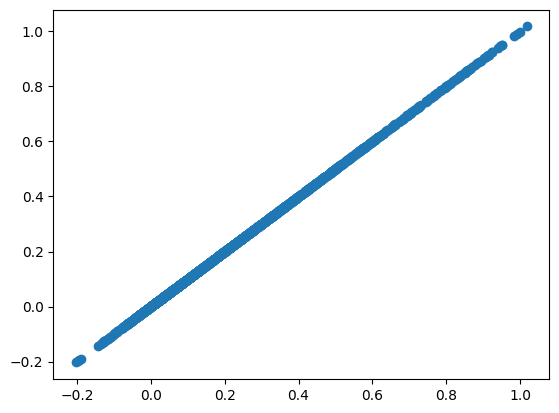

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

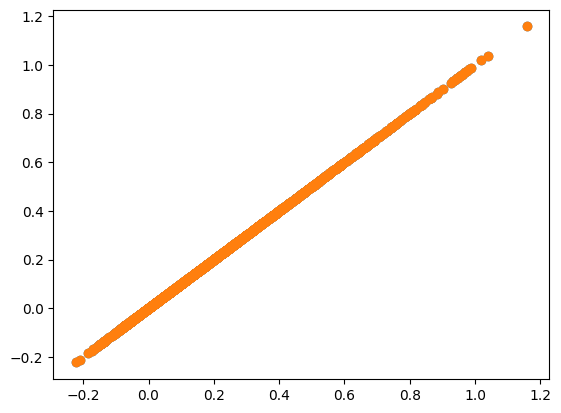

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
mycebmf.tau

array([[149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267],
       [149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267],
       [149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267],
       ...,
       [149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267],
       [149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267],
       [149.85952267, 149.85952267, 149.85952267, ..., 149.85952267,
        149.85952267, 149.85952267]], shape=(50, 40))

In [9]:
print(mycebmf.prior_F
      )

mycebmf.update_loading_factor_k(k=0)

norm


In [10]:
k=0

mycebmf.cal_partial_residuals(k=k)
compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau  )
compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  )
 

(array([-0.08925157, -0.28814442, -0.02451475, -0.29003483, -0.11661163,
        -0.2256171 , -0.06425348, -0.14777742, -0.11277154, -0.07311722,
        -0.0094385 , -0.26462986, -0.08066313, -0.19618269, -0.00612715,
        -0.03905846, -0.09129674, -0.16711658, -0.02801993, -0.26260588,
        -0.16487768, -0.20403365,  0.00479448, -0.02441062, -0.21394649,
        -0.12878982, -0.28767332, -0.01718138, -0.26426705, -0.08987346,
        -0.13463285, -0.2174466 , -0.18122377, -0.14258747, -0.09205081,
        -0.16134404, -0.08054915, -0.05706779, -0.03411423, -0.19143424]),
 array([0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
        0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
        0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
        0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
        0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
        0.00603951, 0.00603951, 0.00603951, 0.00603951, 0.00603951,
      

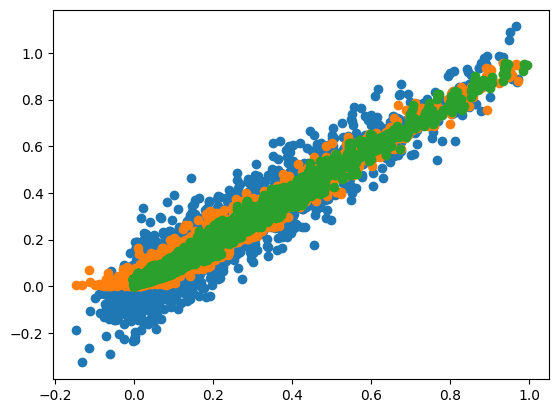

In [11]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)


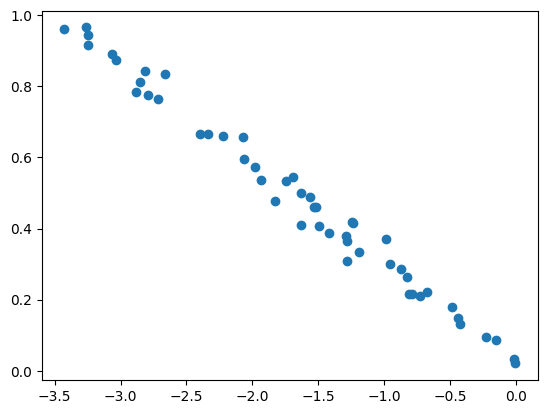

In [12]:
plt.scatter(mycebmf.L[:,0], u)

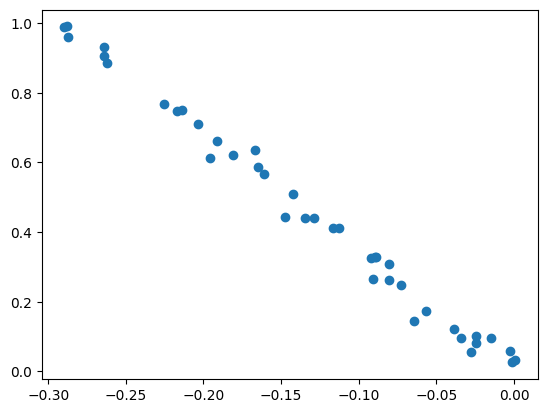

In [13]:
plt.scatter(mycebmf.F[:,0], v)

In [14]:
mycebmf.L[:,1]

array([-0.0475535 , -0.00608872, -0.00245807, -0.19239935,  0.27008088,
        0.19107046,  0.00995691, -0.03874453,  0.0074655 , -0.11988451,
        0.32849808, -0.17012197,  0.14336348, -0.10908794, -0.07473298,
        0.00748458,  0.17386007, -0.00560392, -0.03456045, -0.00579356,
        0.09407431, -0.13018627, -0.27334909, -0.33626847, -0.04038852,
        0.17885128,  0.32736355, -0.10433511,  0.0088045 ,  0.01247123,
       -0.04246561,  0.08281876,  0.00064934,  0.32071402, -0.00879695,
        0.05001257, -0.06493121, -0.02533795,  0.04399561,  0.43471854,
       -0.13115101, -0.05378994,  0.11656519, -0.06332062, -0.22055102,
        0.167663  , -0.11526181,  0.06375929, -0.10509886,  0.00215313])

In [15]:
for i in range(40):
    mycebmf.iter()

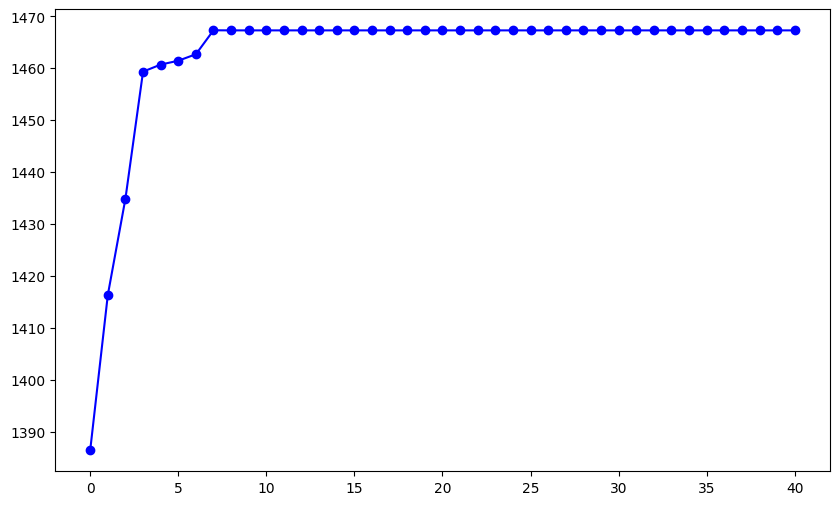

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

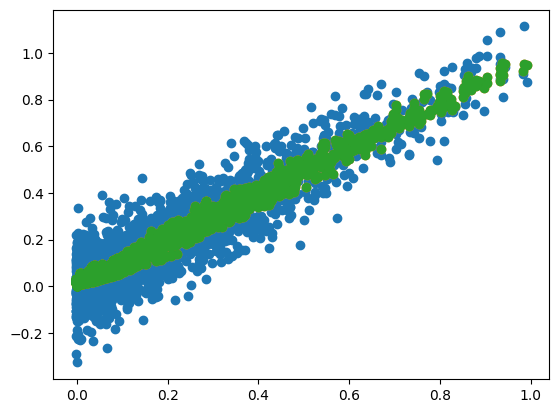

In [17]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix) 
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

In [18]:
mycebmf.L
 

array([[-7.79973139e-001, -1.03848162e-273,  1.37484861e-257,
         4.10013217e-257, -1.83872844e-313],
       [-2.65447918e+000, -2.25290042e-274,  5.16664499e-258,
         8.81023914e-258, -3.87389464e-314],
       [-1.66056245e-002, -9.33481191e-275,  4.00651763e-260,
         3.68695352e-258, -1.71510919e-314],
       [-8.67924898e-001, -2.13652451e-273,  3.05611791e-257,
         8.42596778e-257, -3.77091722e-313],
       [-4.32820745e-001,  2.81047304e-273, -4.18722031e-257,
        -1.10862357e-256,  4.95176566e-313],
       [-4.23252123e-001,  2.12862806e-273, -3.09851447e-257,
        -8.39605759e-257,  3.75420525e-313],
       [-1.68041356e+000,  3.40507674e-274, -4.29616128e-258,
        -1.34408007e-257,  6.03996724e-314],
       [-1.51138548e+000, -9.30399449e-274,  1.47679892e-257,
         3.67498317e-257, -1.63463643e-313],
       [-3.23666454e+000,  2.59053844e-274, -1.54546178e-258,
        -1.02742381e-257,  4.68562469e-314],
       [-4.76769832e-001, -1.63818995